In [10]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
%matplotlib inline

In [11]:
def res1(x):
    a = max(x[0], x[1]) >= 0
    b = 5*x[0] - 4*x[1] - max(2*x[0], 1*x[1]) * 0.7 <= 10.8
    c = 5*x[0] - 4*x[1] + max(2*x[0], 1*x[1]) * 0.7 >= 5.2
    
    return a and b and c

def res2(x):
    a = max(x[0], x[1]) >= 0
    b = 3*x[0] - 5*x[1] - max(0.5*x[0], 1*x[1]) * 0.6 <= 2.9
    c = 3*x[0] - 5*x[1] + max(0.5*x[0], 1*x[1]) * 0.6 >= 1.1

    return a and b and c

In [12]:
def energy(x):
    r1 = res1(x)
    r2 = res2(x)

    return x[0] + 5*x[1] + 0.2 * max(x[0], x[1]) if r1 and r2 else None

In [13]:
T = 1000000
ep = 1000000
P = 0

In [14]:
def Tm(initialTemperature, i):
    T = initialTemperature / 2
    return T

In [15]:
def takestate(state):
    ub = 12.0
    lb = 0.0
    state_new = np.random.uniform(0, 1, (1, 2)) * (ub - lb) + lb
    state_new = state_new[0]
    return state_new

In [16]:
def initstate():
    ub = 12.0
    lb = 0.0
    E_can = None
    while E_can is None:
        init_r = np.random.uniform(0, 1, (1, 2)) * (ub - lb) + lb
        init_r = init_r[0]
        E_can = energy(init_r)
    return init_r, E_can

In [17]:
T = 1000000
P = 0
r_new, E_curr = initstate()
for e in range(ep):
    r_new = takestate(r_new)
    E_can = energy(r_new)
    if E_can != None:
        if E_can > E_curr: 
            E_curr = E_can
            R_max = r_new
        elif E_can <= E_curr:
            dE = E_can - E_curr
            if T > 1:
                P = math.exp(-dE/T)
                Rand = random.random()
                if P > Rand:
                    T = Tm(T, e)
                    E_curr = E_can
                    R_max = r_new
print(R_max)

[11.19082594  7.3733408 ]


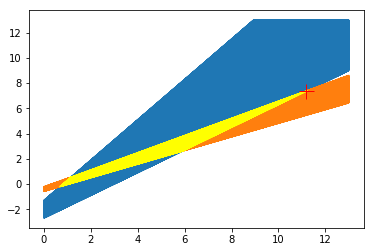

In [22]:
xx0 = []
yy0 = []
xx1 = []
yy1 = []
xx2 = []
yy2 = []

r = np.arange(-10.0, 13.0, 0.01)
for y in r:
    for x in r:
        r1 = res1([x, y])
        r2 = res2([x, y])
        if r1 and r2:
            xx0.append(x)
            yy0.append(y)
        elif r1:
            xx1.append(x)
            yy1.append(y)
        elif r2:
            xx2.append(x)
            yy2.append(y)

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(xx1, yy1)
ax.plot(xx2, yy2)
ax.plot(xx0, yy0, 'yellow')
ax.plot(R_max[0], R_max[1], 'r+', markersize=15)
plt.show()


fig.savefig('to.png')   # save the figure to file

